In [ ]:
# https://towardsdatascience.com/meet-bertopic-berts-cousin-for-advanced-topic-modeling-ea5bf0b7faa3
%%capture
!pip install bertopic

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import json
#uploaded = files.upload()
#with open("uploaded", "r", encoding="utf-8") as f:
  #docs= json.load(f)["headline_text"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/" .


Mounted at /content/drive
cp: -r not specified; omitting directory '/content/drive/My Drive/'


In [ ]:
#IMPORT
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("/content/drive/My Drive/TIME3"+ "/*.csv")

# list of merged files returned
files = glob.glob(files)


#print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)


                 id  conversation_id  referenced_tweets.replied_to.id  \
0      1.011742e+18     1.011736e+18                     1.011737e+18   
1      1.011736e+18     1.011736e+18                              NaN   
2      1.011731e+18     1.011731e+18                              NaN   
3      1.011731e+18     1.011731e+18                              NaN   
4      1.011718e+18     1.011718e+18                              NaN   
...             ...              ...                              ...   
50067  9.983942e+17     9.983942e+17                              NaN   
50068  9.983930e+17     9.983930e+17                              NaN   
50069  9.983908e+17     9.983908e+17                              NaN   
50070  9.983737e+17     9.983737e+17                              NaN   
50071  9.983694e+17     9.983694e+17                              NaN   

       referenced_tweets.retweeted.id  referenced_tweets.quoted.id  \
0                                 NaN                

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df['text'] #text

0        @rafaelmezquita Claro que sí. Tan pronto termi...
1        Este miércoles #DespiertaConLoret más temprano...
2        Importante no mezclar: haga lo que haga fuera ...
3        Nos escandalizamos como si a Maradona lo hubié...
4        Las 6 cosas que hay que cambiar de las campaña...
                               ...                        
50067    Morena, el partido de Andrés Manuel, votó en c...
50068    En mi gobierno no vamos a permitir acuerdos qu...
50069    📺 #EnVivo Segundo Debate Presidencial con la p...
50070    A partir de este momento, y hasta el término d...
50071    Camino al debate! Que emoción!! Vamos a ganar!...
Name: text, Length: 50072, dtype: object

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt') # download the punkt tokenizer if you haven't done it before

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re

# Sample DataFrame with a 'text' column
#df = pd.DataFrame({'text': ['Check out this cool website: https://www.example.com/abc123', 'Another URL: www.example.org']})
#df = pd.read_csv(combined_csv.to_csv) #('example_dataset.csv')
df = pd.concat(map(pd.read_csv, files), ignore_index=True)

# Define the regular expression pattern to match URLs
url_pattern = re.compile(r"(https?://\S+|www\.\S+)")

# Apply the sub() function to the 'text' column
text_column = df['text'].str.replace(r'@\w+', '').str.replace(r'http\S+', '').str.replace(r'[^a-zA-Z\s]', '').str.strip()
#text_column = df['text'].apply(lambda x: url_pattern.sub('', x))
#df["Cleaned_Tweet"] = df["Tweet"].str.replace(r'@\w+', '').str.replace(r'http\S+', '').str.replace(r'[^a-zA-Z\s]', '').str.strip()


# Print the result
print(text_column)

0        Claro que s Tan pronto termine el Mundial Saludos
1              Este mircoles DespiertaConLoret ms temprano
2        Importante no mezclar haga lo que haga fuera d...
3        Nos escandalizamos como si a Maradona lo hubir...
4        Las  cosas que hay que cambiar de las campaasn...
                               ...                        
50067    Morena el partido de Andrs Manuel vot en contr...
50068    En mi gobierno no vamos a permitir acuerdos qu...
50069    EnVivo Segundo Debate Presidencial con la pres...
50070    A partir de este momento y hasta el trmino de ...
50071            Camino al debate Que emocin Vamos a ganar
Name: text, Length: 50072, dtype: object


In [ ]:
text_column = text_column.str.lower()
print(text_column)

0        claro que s tan pronto termine el mundial saludos
1              este mircoles despiertaconloret ms temprano
2        importante no mezclar haga lo que haga fuera d...
3        nos escandalizamos como si a maradona lo hubir...
4        las  cosas que hay que cambiar de las campaasn...
                               ...                        
50067    morena el partido de andrs manuel vot en contr...
50068    en mi gobierno no vamos a permitir acuerdos qu...
50069    envivo segundo debate presidencial con la pres...
50070    a partir de este momento y hasta el trmino de ...
50071            camino al debate que emocin vamos a ganar
Name: text, Length: 50072, dtype: object


In [ ]:
import re
# Remove punctuation
text_column = text_column.map(lambda x: re.sub('[,\.!?¡#@¿&$/]', '', x))
# Lowercase the words
text_column = text_column.map(lambda x: x.lower())

TypeError: ignored

In [ ]:
import numpy as np
text_column = text_column.replace(np.nan, '')
#df['text'] = df['text'].replace(np.nan, '')
print(text_column)

0        claro que s tan pronto termine el mundial saludos
1              este mircoles despiertaconloret ms temprano
2        importante no mezclar haga lo que haga fuera d...
3        nos escandalizamos como si a maradona lo hubir...
4        las  cosas que hay que cambiar de las campaasn...
                               ...                        
50067    morena el partido de andrs manuel vot en contr...
50068    en mi gobierno no vamos a permitir acuerdos qu...
50069    envivo segundo debate presidencial con la pres...
50070    a partir de este momento y hasta el trmino de ...
50071            camino al debate que emocin vamos a ganar
Name: text, Length: 50072, dtype: object


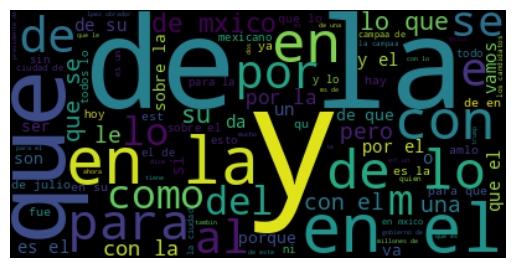

In [ ]:
#Library to form wordcloud :
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "".join(text_column)
#Generating the wordcloud :
wordcloud = WordCloud().generate(text)

#To remove the axis value :
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('spanish')
text_column = text_column.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Stopwords in English
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
text_column = text_column.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(text_column)

0                 claro tan pronto termine mundial saludos
1                   mircoles despiertaconloret ms temprano
2        importante mezclar haga haga cancha maradona s...
3        escandalizamos si maradona hubiramos perdido h...
4                        cosas cambiar campaasnncolumna nn
                               ...                        
50067            morena partido andrs manuel vot tpp cptpp
50068    gobierno vamos permitir acuerdos estn basados ...
50069    envivo segundo debate presidencial presencia p...
50070    partir momento trmino transmisin equipo trabaj...
50071                     camino debate emocin vamos ganar
Name: text, Length: 50072, dtype: object


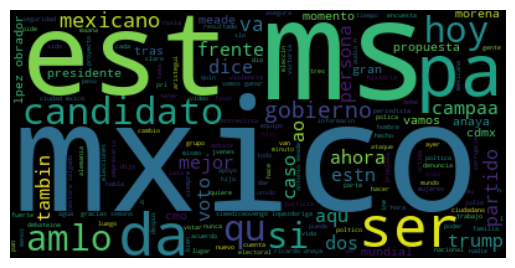

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "".join(text_column)
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from bertopic import BERTopic

model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2') #, min_topic_size= 300Lo cambie a 10
headline_topics, _ = model.fit_transform(text_column) #I changed to data.text

Batches:   0%|          | 0/927 [00:00<?, ?it/s]

2023-08-23 15:12:17,937 - BERTopic - Transformed documents to Embeddings
2023-08-23 15:13:27,939 - BERTopic - Reduced dimensionality
2023-08-23 15:13:35,142 - BERTopic - Clustered reduced embeddings


In [ ]:
headline_topics

[-1,
 20,
 2,
 20,
 2,
 1,
 20,
 -1,
 20,
 20,
 -1,
 -1,
 -1,
 -1,
 45,
 480,
 0,
 -1,
 11,
 29,
 1,
 42,
 211,
 11,
 8,
 2,
 -1,
 -1,
 11,
 11,
 4,
 1,
 480,
 11,
 11,
 47,
 -1,
 -1,
 675,
 -1,
 -1,
 43,
 47,
 321,
 -1,
 4,
 47,
 -1,
 7,
 183,
 151,
 -1,
 4,
 28,
 -1,
 183,
 11,
 11,
 11,
 -1,
 -1,
 -1,
 11,
 11,
 48,
 86,
 47,
 321,
 45,
 69,
 -1,
 69,
 -1,
 11,
 11,
 4,
 42,
 103,
 11,
 11,
 -1,
 11,
 -1,
 11,
 11,
 47,
 -1,
 675,
 48,
 -1,
 17,
 -1,
 47,
 45,
 45,
 -1,
 -1,
 7,
 -1,
 4,
 321,
 -1,
 -1,
 9,
 11,
 11,
 675,
 0,
 -1,
 9,
 -1,
 -1,
 47,
 321,
 8,
 45,
 4,
 -1,
 9,
 214,
 11,
 -1,
 208,
 -1,
 11,
 6,
 11,
 11,
 11,
 11,
 11,
 11,
 675,
 -1,
 -1,
 47,
 -1,
 47,
 321,
 47,
 4,
 45,
 47,
 -1,
 -1,
 -1,
 -1,
 2,
 8,
 2,
 45,
 -1,
 -1,
 -1,
 8,
 152,
 -1,
 47,
 5,
 -1,
 -1,
 -1,
 11,
 11,
 11,
 47,
 47,
 321,
 12,
 12,
 47,
 4,
 4,
 45,
 47,
 11,
 11,
 16,
 -1,
 58,
 -1,
 -1,
 -1,
 675,
 -1,
 -1,
 2,
 12,
 -1,
 11,
 4,
 -1,
 11,
 11,
 11,
 -1,
 11,
 11,
 675,
 -1,
 47,
 321,

In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 963


,Topic,Count,Name,Representation,Representative_Docs
0,-1,11166,-1_amlo_video_dos_lopezobrador_,"[amlo, video, dos, lopezobrador_, meade, ciuda...","[suscribo firme posición presidente @epn, así ..."
1,0,629,0_méxicoconmeade_oportunidades_queremos_méxico...,"[méxicoconmeade, oportunidades, queremos, méxi...",[zacatlán establecimos 3 grandes prioridades i...
2,1,385,1_candidato_candidatos_candidata_invitamos,"[candidato, candidatos, candidata, invitamos, ...",[principal línea investigación homicidio marib...
3,2,323,2_saludos_escucharnos_gracias_abrazo,"[saludos, escucharnos, gracias, abrazo, muchas...","[¡gracias escucharnos, estimado carlos! ¡salud..."
4,3,227,3_radio_formula_lopezdoriga_joaquin_mesadelosc...,"[radio_formula, lopezdoriga, joaquin, mesadelo...",[dice @tatclouthier favor revisar reforma educ...


In [ ]:
vectorizer_model = text_column
topic_model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2') #, min_topic_size= 125
#BERTopic(embedding_model="vinai/bertweet-base", vectorizer_model=vectorizer_model,low_memory=True,calculate_probabilities=True,verbose=True, n_gram_range=(1, 3))
#model.fit_transform(tweet_list)
tweet_list = text_column.tolist()
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)
topics, probs = topic_model.fit_transform(tweet_list)

get_bert_topics (topic_model, len(set(topics))-1)

Batches:   0%|          | 0/1565 [00:00<?, ?it/s]

2023-08-23 16:25:56,823 - BERTopic - Transformed documents to Embeddings
2023-08-23 16:27:28,294 - BERTopic - Reduced dimensionality
2023-08-23 16:27:35,194 - BERTopic - Clustered reduced embeddings


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 1633,Topic # 1634,Topic # 1635,Topic # 1636,Topic # 1637,Topic # 1638,Topic # 1639,Topic # 1640,Topic # 1641,Topic # 1642
0,candidato,lopezdoriga,discrecin,electoral,tercer,rusia,rusia,gane,migrantes,urna,...,ataquen,,,,olga,,,,,detectaron
1,candidatos,joaquin,recomienda,electorales,debateine,arena,arabia,gana,separacin,querida,...,avientan,,,,snchez,,,,,jaime
2,candidata,mesadecoordinadores,video,boletas,presidencial,rostov,saudita,ganar,menores,rompeviento,...,dichos,,,,cordero,,,,,rosa
3,coalicin,mesadepresidentes,imgenes,infierno,debate,senegal,octavos,ganaron,familias,queridaurna,...,perros,,,,convencida,,,,,rodrguez
4,alcalda,afirma,videos,exconsejero,mrida,mundial,mohamed,ganadores,ejecutiva,cuchareadas,...,acusan,,,,difiere,,,,,arancel
5,candidatura,seala,fuertes,proceso,finalizar,copa,stadium,ganado,nios,escamilla,...,scheie,,,,tejidos,,,,,espejos
6,prd,contesta,pato,escenario,segundo,mex,arena,ganamos,migrante,crteles,...,resoluciones,,,,amnista,,,,,asustarnos
7,mejor,simediceovengo,tricolor,fraude,bronco,fotos,uruguay,ganmeade,frontera,confiables,...,nestora,,,,cuestiona,,,,,academy
8,presidenciales,dice,motociclista,mapache,debatitln,vamoscontodo,guilas,gan,separados,dibella,...,judiciales,,,,enefyporadela,,,,,abrirse
9,morena,asegura,aristegui,consejero,mitofsky,neymar,robbie,sinmiedoalaibero,jaulas,conducido,...,violaron,,,,opina,,,,,cartelerasn


In [ ]:
get_bert_topics (topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 937,Topic # 938,Topic # 939,Topic # 940,Topic # 941,Topic # 942,Topic # 943,Topic # 944,Topic # 945,Topic # 946
0,candidata,lopezdoriga,video,directora,electoral,mxicoconmeade,siria,debateenaristegui,juntosconanaya,aeropuerto,...,suspender,,,alemania,comparemos,,,,,
1,candidatos,joaquin,deportes,leychayote,electorales,queremos,rusia,ndebateenaristegui,necesita,slim,...,fbrica,,,puigdemont,trayectorias,,,,,
2,candidato,mesadeloscoordinadores,videos,ruelas,tribunal,prspero,ataque,campaa,cambio,nuevo,...,ricos,,,atentado,preparacin,,,,,
3,maribel,afirma,concachampions,corrupcin,boleta,mxicochingn,qumico,rbsamen,presidencial,construccin,...,abejas,,,miios,vencidas,,,,,
4,diputada,mesadelospresidentes,toronto,publicidadoficial,bronco,oportunidades,unido,vocero,primer,cancelar,...,crecimiento,,,deniegue,honestidad,,,,,
5,barajas,dice,momento,jeringas,pejenovelas,preparado,reino,autocrtica,debate,allard,...,suspende,,,atropellamiento,juego,,,,,
6,presidencia,seala,captan,eleccin,avionetagate,potencia,francia,delegacionales,mxico,luca,...,pasnnenpunto,,,mortal,congruencia,,,,,
7,invitamos,simedicennovengo,golazo,cristina,incluir,mxico,putin,jefa,,carlos,...,movimientonnah,,,autorizan,trayectoria,,,,,
8,presidenciales,dr,arroja,desechables,rodrguez,listos,qumicas,vocera,,catastrfico,...,magnate,,,blgica,medio,,,,,
9,michoacn,contesta,amrica,eliminacin,inclusin,escuche,ataques,facultades,,internacional,...,ahorcan,,,abandonar,proyectos,,,,,


In [ ]:
topic_0 = topic_model.get_topic(0)
topic_minus_1 = topic_model.get_topic(-1)
topic_1 = topic_model.get_topic(1)
topic_2 = topic_model.get_topic(2)
topic_3 = topic_model.get_topic(3)
topic_4 = topic_model.get_topic(4)
topic_5 = topic_model.get_topic(5)
topic_6 = topic_model.get_topic(6)
topic_7 = topic_model.get_topic(7)
topic_8 = topic_model.get_topic(8)
topic_9 = topic_model.get_topic(9)

print("Topic -1:", topic_minus_1)
print("Topic 0:", topic_0)
print("Topic 1:", topic_1)
print("Topic 2:", topic_2)
print("Topic 3:", topic_3)
print("Topic 4:", topic_4)
print("Topic 5:", topic_5)
print("Topic 6:", topic_6)
print("Topic 7:", topic_7)
print("Topic 8:", topic_8)
print("Topic 9:", topic_9)

Topic -1: [('estn', 0.0006559467523217254), ('poltica', 0.0006513559832950569), ('gobierno', 0.0006471764948057112), ('nacional', 0.0006393226263658957), ('aos', 0.0006363791673698877), ('lpez', 0.000621214515806213), ('ser', 0.000618014067148128), ('si', 0.0006146327040117467), ('qu', 0.0006134787899159459), ('mujer', 0.0006050933861838234)]
Topic 0: [('candidato', 0.006249635178468306), ('candidatos', 0.005822768968054967), ('candidata', 0.003944406812713077), ('coalicin', 0.003758787218150255), ('alcalda', 0.0033530713996679303), ('candidatura', 0.0026777781496321335), ('prd', 0.0025281084975217463), ('mejor', 0.0024165167786353962), ('presidenciales', 0.0024099344926878405), ('morena', 0.0023760196678921917)]
Topic 1: [('lopezdoriga', 0.01552042627664592), ('joaquin', 0.015480780951290572), ('mesadecoordinadores', 0.013160062223099038), ('mesadepresidentes', 0.009894842274639822), ('afirma', 0.009574456134305027), ('seala', 0.007622918215352747), ('contesta', 0.007465188313717624),

In [ ]:
##import pandas as pd
import matplotlib.pyplot as plt

# Define the topics and their information
topics = [
    {'Topic': -1, 'Keywords': [('amlo', 0.032755345553706794), ('anaya', 0.02485435079268911), ('meade', 0.022036665506048898), ('trump', 0.012751611281203072), ('video', 0.011399965176903443), ('ricardo', 0.011360569139303531), ('debate', 0.011039156839322805), ('candidatos', 0.010159866803633556), ('xico', 0.009927321578839651), ('obrador', 0.009777169284748168)]},
    {'Topic': 0, 'Keywords': [('méxico', 0.05023686209079619), ('joseameadek', 0.040536683081720745), ('vamos', 0.024339073354333066), ('país', 0.02145671763760549), ('gobierno', 0.019723033434135707), ('campaña', 0.017636918582072985), ('ricardoanayac', 0.015348728482317912), ('hoy', 0.01507590935567979), ('lopezobrador_', 0.014975112397105831), ('mexicanos', 0.0149747882602566)]},
    {'Topic': 1, 'Keywords': [('anaya', 0.05663037557136107), ('pol', 0.0497063468094558), ('amlo', 0.04601895733302543), ('xico', 0.041373060253634644), ('ricardo', 0.038869501497310555), ('tica', 0.03660313766450834), ('est', 0.02221826865573301), ('pe', 0.019432646677382825), ('ser', 0.019119538999481323), ('pri', 0.017591404014427818)]},
    {'Topic': 2, 'Keywords': [('meade', 0.2437823335031567), ('antonio', 0.06887290533824063), ('jos', 0.06483825203360108), ('campa', 0.042981094396672075), ('amlo', 0.04142493957754153), ('anaya', 0.03236319919202914), ('presenta', 0.0278789799554796), ('debate', 0.02730772422582015), ('obrador', 0.026478972953063215), ('pez', 0.026112426140234145)]},
    {'Topic': 3, 'Keywords': [('lopezdoriga', 0.27068561055928), ('joaquin', 0.17889054329351467), ('radio_formula', 0.14095489860401358), ('simedicennovengo', 0.1358243657651243), ('dice', 0.07228311778591312), ('lopezobrador_', 0.054237998)]}
    ]


In [ ]:
import pandas as pd

# Assuming you have the topics and their information as shown in the example

# Define the topics and their information
topics = [
    {'Topic': -1, 'Keywords': [('amlo', 0.032755345553706794), ('anaya', 0.02485435079268911), ('meade', 0.022036665506048898), ('trump', 0.012751611281203072), ('video', 0.011399965176903443), ('ricardo', 0.011360569139303531), ('debate', 0.011039156839322805), ('candidatos', 0.010159866803633556), ('xico', 0.009927321578839651), ('obrador', 0.009777169284748168)]},
    {'Topic': 0, 'Keywords': [('méxico', 0.05023686209079619), ('joseameadek', 0.040536683081720745), ('vamos', 0.024339073354333066), ('país', 0.02145671763760549), ('gobierno', 0.019723033434135707), ('campaña', 0.017636918582072985), ('ricardoanayac', 0.015348728482317912), ('hoy', 0.01507590935567979), ('lopezobrador_', 0.014975112397105831), ('mexicanos', 0.0149747882602566)]},
    {'Topic': 1, 'Keywords': [('anaya', 0.05663037557136107), ('pol', 0.0497063468094558), ('amlo', 0.04601895733302543), ('xico', 0.041373060253634644), ('ricardo', 0.038869501497310555), ('tica', 0.03660313766450834), ('est', 0.02221826865573301), ('pe', 0.019432646677382825), ('ser', 0.019119538999481323), ('pri', 0.017591404014427818)]},
    {'Topic': 2, 'Keywords': [('meade', 0.2437823335031567), ('antonio', 0.06887290533824063), ('jos', 0.06483825203360108), ('campa', 0.042981094396672075), ('amlo', 0.04142493957754153), ('anaya', 0.03236319919202914), ('presenta', 0.0278789799554796), ('debate', 0.02730772422582015), ('obrador', 0.026478972953063215), ('pez', 0.026112426140234145)]},
    {'Topic': 3, 'Keywords': [('lopezdoriga', 0.27068561055928), ('joaquin', 0.17889054329351467), ('radio_formula', 0.14095489860401358), ('simedicennovengo', 0.1358243657651243), ('dice', 0.07228311778591312), ('lopezobrador_', 0.054237998417535294), ('yeidckol', 0.050409657433691725), ('mesadeloscoordinadores', 0.03858183041385515), ('mesadelospresidentes', 0.038477303103835785), ('damianzepeda', 0.03829968255876792)]},
    {'Topic': 5, 'Keywords': [('campa', 0.35177982704413535), ('as', 0.08864387679028078), ('anaya', 0.08647771823912384), ('arranca', 0.05901297279498457), ('inicia', 0.0558748468477351), ('amlo', 0.04186157838237678), ('ju', 0.04131102134148238), ('suma', 0.03964088605009123), ('rez', 0.036234650035526624), ('tercera', 0.03418814772101912)]},
    {'Topic': 6, 'Keywords': [('debate', 0.35280826481240785), ('presidencial', 0.23402946004937336), ('primer', 0.1858232650040505), ('anaya', 0.05356043531590912), ('listo', 0.04302471626039922), ('ine', 0.042979611721823685), ('abrir', 0.042908023141278694), ('debates', 0.041182006538204745), ('aunque', 0.03982874809310215), ('as', 0.03471402142170499)]},
    {'Topic': 7, 'Keywords': [('video', 0.23339667978729095), ('youtube', 0.05270504390370462), ('videocharla', 0.050461876268542594), ('viral', 0.03825762989411832), ('videos', 0.03718417128175811), ('deportes', 0.036858664044828834), ('momento', 0.03446533315014746), ('así', 0.032867625868943776), ('astillada', 0.02509915261048198), ('anaya', 0.024220604585536876)]},
    {'Topic': 8, 'Keywords': [('electoral', 0.2924614414001789), ('tribunal', 0.10045473247810759), ('electorales', 0.09901325128628775), ('boleta', 0.06234421766261245), ('bronco', 0.05172854837108851), ('proceso', 0.0369546696509233), ('el', 0.03631612450251587), ('tepjf_informa', 0.02888857574122269), ('rodríguez', 0.02752241785261372), ('defensa', 0.025032638625639952)]},
    {'Topic': 9, 'Keywords': [('gracias', 0.3933536863260662), ('saludos', 0.3284405140672523), ('escucharnos', 0.18764962588882741), ('abrazo', 0.07427052852040401), ('muchas', 0.06381022985048447), ('estimado', 0.0430448724995237), ('leer', 0.03325828329145206), ('salud', 0.03172047958501586), ('mañana', 0.030923946102746812), ('gusto', 0.029348677105415208)]}
]

# Create a DataFrame with the topics and their keywords
topics_table = pd.DataFrame({'Topic': [topic['Topic'] for topic in topics],
                             'Keywords': [', '.join([kw for kw, _ in topic['Keywords']]) for topic in topics]})

# Display the topics and their keywords as a table
print(topics_table)


   Topic                                           Keywords
0     -1  amlo, anaya, meade, trump, video, ricardo, deb...
1      0  méxico, joseameadek, vamos, país, gobierno, ca...
2      1  anaya, pol, amlo, xico, ricardo, tica, est, pe...
3      2  meade, antonio, jos, campa, amlo, anaya, prese...
4      3  lopezdoriga, joaquin, radio_formula, simedicen...
5      5  campa, as, anaya, arranca, inicia, amlo, ju, s...
6      6  debate, presidencial, primer, anaya, listo, in...
7      7  video, youtube, videocharla, viral, videos, de...
8      8  electoral, tribunal, electorales, boleta, bron...
9      9  gracias, saludos, escucharnos, abrazo, muchas,...


In [ ]:
##import pandas as pd

# Assuming you have the topics_table DataFrame

# Save the table as a CSV file
topics_table.to_csv('topics_table.csv', index=False)
import pandas as pd

# Read the CSV file into a DataFrame
imported_table = pd.read_csv('topics_table.csv')

# Display the imported table
print(imported_table)


   Topic                                           Keywords
0     -1  amlo, anaya, meade, trump, video, ricardo, deb...
1      0  méxico, joseameadek, vamos, país, gobierno, ca...
2      1  anaya, pol, amlo, xico, ricardo, tica, est, pe...


In [ ]:
##import pandas as pd

# Assuming you have already retrieved the topics as topic_0 and topic_minus_1

# Create a DataFrame with the topics
topics_table = pd.DataFrame({'Topic 0': [topic_0], 'Topic -1': [topic_minus_1]})

# Display the topics as a table
print(topics_table)

                                             Topic 0  \
0  [(méxico, 0.05023686209079619), (joseameadek, ...   

                                            Topic -1  
0  [(amlo, 0.032755345553706794), (anaya, 0.02485...  


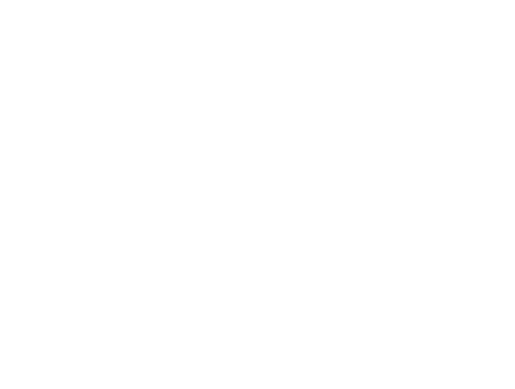

In [ ]:
# DENDOGRAM
import matplotlib.pyplot as plt
# Generate the topic dendrogram
topic_model.visualize_hierarchy()

# If you want to save the plot as an image file (e.g., PNG)
# You can customize the figsize and dpi parameters according to your preference
plt.savefig('topic_dendrogram.png', dpi=500)
plt.axis("off")
plt.show()

In [ ]:
from pandas._libs.tslibs import timestamps
#!pip install bertopic

import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic

# Assuming you have already fitted your BERTopic model and have `topic_model` and `docs` available

# Apply topic extraction to your dataset
topics, _ = topic_model.transform(tweet_list)

# Create a DataFrame with the document timestamps and corresponding topics
df = pd.DataFrame({'Timestamp': timestamps, 'Topic': topics})

# Generate the topic evolution visualization
topic_model.visualize_topics_over_time(df)

# If you want to save the plot as an image file (e.g., PNG)
# You can customize the figsize and dpi parameters according to your preference
plt.savefig('topic_evolution.png', dpi=300)
plt.show()

# Generate the topic evolution visualization
topic_model.visualize_topics_over_time(text_column)

# If you want to save the plot as an image file (e.g., PNG)
# You can customize the figsize and dpi parameters according to your preference
plt.savefig('topic_evolution.png', dpi=300)
plt.axis("off")
plt.show()

Batches:   0%|          | 0/927 [00:00<?, ?it/s]

2023-06-13 20:00:39,194 - BERTopic - Reduced dimensionality
2023-06-13 20:00:49,381 - BERTopic - Predicted clusters


AttributeError: ignored

In [ ]:
##pip install bertopic
from bertopic import BERTopic
import pandas as pd
#model = BERTopic.load("model_dir",embedding_model='paraphrase-MiniLM-L3-v2')
tweets = df["text"].tolist()
topics = topic_model.transform(tweets)
topic_labels = topics[0]  # Extract the topic labels for each tweet
#assigned_topics = model.get_topic(topic_labels)  # Assign each tweet to its corresponding topic
#topic_tweets = {}
#for topic, tweet_indices in assigned_topics.items():
    #topic_tweets[topic] = [tweets[idx] for idx in tweet_indices]


Batches:   0%|          | 0/1565 [00:00<?, ?it/s]

TypeError: ignored

In [ ]:
topic_labels, _ = topic_model.transform(tweets)
topic_tweets = {}
for idx, topic in enumerate(topic_labels):
    if topic not in topic_tweets:
        topic_tweets[topic] = []
    topic_tweets[topic].append(tweets[idx])

NameError: ignored

In [ ]:
topic_tweets[0]

NameError: ignored

In [ ]:
docs = tweet_list
# Preprocess Documents
documents = df({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
coherence

NameError: ignored

In [ ]:
model.get_topic(-1)

[('amlo', 0.025691606396977748),
 ('anaya', 0.01863422625701202),
 ('meade', 0.015835898578059542),
 ('pri', 0.011950535492511283),
 ('ricardo', 0.011057283159469222),
 ('candidatos', 0.010316127508815371),
 ('8220', 0.009467059436400646),
 ('candidato', 0.00938539747921523),
 ('joseameadek', 0.009311955879600832),
 ('debate', 0.009154659848455114)]

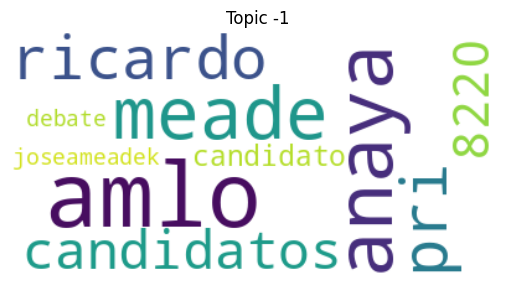

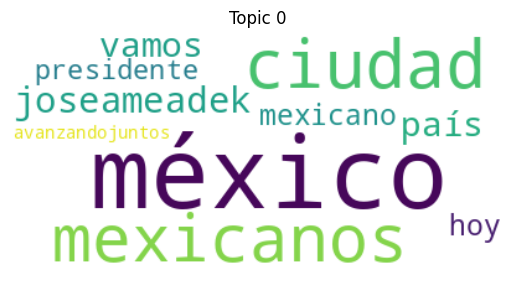

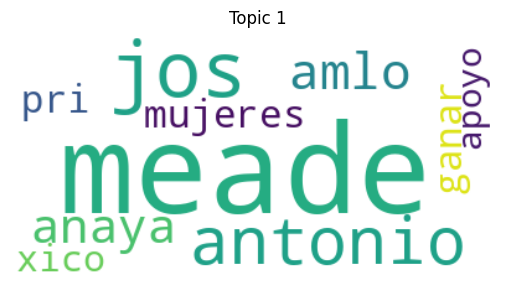

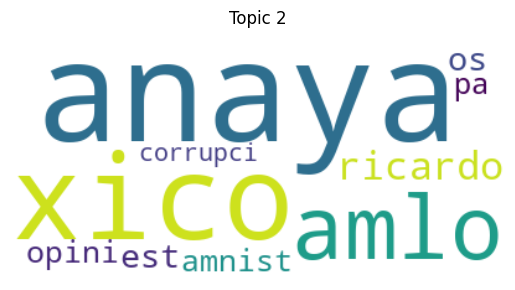

In [ ]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=2000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic"+" "+ str(topic))
    plt.show()

#visualize the top 3 topics
for i in range(-1,3):
    create_wordcloud(model, topic=i)

In [ ]:
a_topic = freq.iloc[2]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('meade', 0.23055593159970847),
 ('jos', 0.05382478228299691),
 ('antonio', 0.05380464149402386),
 ('amlo', 0.02990706123865631),
 ('anaya', 0.02743194803284894),
 ('mujeres', 0.02677440950729336),
 ('ganar', 0.02651407897008548),
 ('pri', 0.026142593765444245),
 ('xico', 0.02509861535713656),
 ('apoyo', 0.022216320981312727)]

In [ ]:
model.visualize_barchart(top_n_topics=50)

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_hierarchy(top_n_topics=30)

In [ ]:
# Select most 3 similar topics
similar_topics, similarity = model.find_topics("politics", top_n = 3)
similar_topics

[6, 3, 2]

In [ ]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('electoral', 0.2839516503206961), ('electorales', 0.12229055845715231), ('proceso', 0.08642173993447895), ('contienda', 0.03969618372063786), ('candidatos', 0.03606837371432504), ('preferencia', 0.03513059975647256), ('amlo', 0.033337811077460866), ('ine', 0.03039430630399337), ('tribunal', 0.02668605921062129), ('reglas', 0.026231447159698353)]
Similarity Score: 0.43916749954223633


In [ ]:
%%bash
mkdir './model_dir'

In [ ]:
# Save the model in the previously created folder with the name 'my_best_model'
model.save("./model_dir/my_best_model")

# Load the serialized model
my_best_model = BERTopic.load("./model_dir/my_best_model")
my_best_model

In [ ]:
#import matplotlib.pyplot as plt
#import pandas as pd

# create a pandas dataframe with word counts
#df = pd.DataFrame ({'word': ['apple', 'banana', 'cherry', 'date'],
                   #'n': [800, 700, 500, 400]})

# filter the dataframe to include only words with a count greater than 600
df_filtered = df[df['n'] > 600]

# sort the dataframe by count
df_sorted = df_filtered.sort_values('n', ascending=False)

# create a bar chart using matplotlib
plt.bar(df_sorted['word'], df_sorted['n'])

# set the x-axis label to be blank
plt.xlabel('')
# rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)
# set the y-axis label
plt.ylabel('Count')

# show the plot
plt.show()


KeyError: ignored